# MTA Data Discovery and Modeling with Pandas - Data Engineering Process Fundamental

### Credits
This notebook was created by Oscar Garcia - ozkary.com.

## GitHub Repository

For more details, contributions, and issues, please visit our GitHub repository: 

[MTA Data Analysis](https://github.com/ozkary/data-engineering-mta-turnstile)


#### Description:
This notebook demonstrates a comprehensive data analysis and modeling process using pandas. It covers the following key steps:

1. **Data Loading and Preparation**:
   - Downloading a CSV file from a URL directly into memory using the `requests` library.
   - Creating a pandas DataFrame from the downloaded content.

2. **Exploratory Data Analysis (EDA)**:
   - Using `pandas.describe()` to generate summary statistics for numerical columns.
   - Interpreting the summary statistics to understand the distribution and spread of the data.

3. **Data Cleaning and Transformation**:
   - Identifying and separating categorical and numerical columns.
   - Renaming columns to follow a consistent naming convention (e.g., converting to lowercase, renaming specific columns).

4. **Data Modeling**:
   - Creating dimension and fact tables to organize the data for efficient querying and reporting.
   - Using pandas to create `dim_station` and `dim_booth` tables and a `fact_turnstile` table.
   - Demonstrating how to join these tables to display relevant information using SQL-like syntax with the `pandasql` library.

5. **Visualization**:
   - Converting line plots to bar charts using `matplotlib` to visualize average arrivals and departures by time slot.

#### Key Features:
- **In-Memory Data Handling**: Efficiently downloading and processing data without writing to disk.
- **Comprehensive EDA**: Detailed analysis of data distributions and summary statistics.
- **Data Modeling**: Clear separation of descriptive attributes and measurable facts using dimension and fact tables.
- **SQL Integration**: Leveraging SQL syntax to manipulate and join pandas DataFrames using the `pandasql` library.
- **Visualization**: Creating informative visualizations to represent data insights.

This notebook serves as a practical guide for data engineers and analysts to perform data analysis, cleaning, transformation, and modeling using pandas, with a focus on creating a structured data model for efficient querying and reporting.


In [2]:
# Standard library imports
from time import time
from pathlib import Path
import requests
from io import StringIO
# Load pandas support for data analysis tasks, dataframe (two-dimensional data structure with rows and columns) management
import pandas as pd    
import numpy as np 

In [ ]:
# URL of the file you want to download. Note: It should be a Saturday date
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_241026.txt'

# Download the file in memory
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Create a DataFrame from the downloaded content
data = StringIO(response.text)
df = pd.read_csv(data)

In [3]:
# open text files downloaded by this notebook
file_name = 'turnstile_230603.txt'
df = pd.read_csv(f'./{file_name}', iterator=False)

# Exploratory Data Analysis (EDA)

In [4]:
# Display the DataFrame first 10 rows
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,00:00:00,REGULAR,2040,985
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,04:00:00,REGULAR,2049,990
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,08:00:00,REGULAR,2057,1010
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,12:00:00,REGULAR,2092,1048
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,16:00:00,REGULAR,2158,1093
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/27/2023,20:00:00,REGULAR,2272,1136
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2023,00:00:00,REGULAR,2339,1169
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2023,04:00:00,REGULAR,2343,1173
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2023,08:00:00,REGULAR,2348,1186
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/28/2023,12:00:00,REGULAR,2367,1226


In [34]:
# use info to get the column names, data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246421 entries, 0 to 246420
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   246421 non-null  object
 1   UNIT                                                                  246421 non-null  object
 2   SCP                                                                   246421 non-null  object
 3   STATION                                                               246421 non-null  object
 4   LINENAME                                                              246421 non-null  object
 5   DIVISION                                                              246421 non-null  object
 6   DATE                                                                  246421 non-null  objec

## Remove Spaces and type case some columns

In [35]:
# remove spaces and type case the columns
df.columns = [column.strip() for column in df.columns]
print(df.columns)
df["ENTRIES"] = df["ENTRIES"].astype(int)
df["EXITS"] = df["EXITS"].astype(int)


Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


## Check columns with special characters and remove them

In [36]:
# Define the set of special characters you want to check for
special_characters_set = set('@#$%/')


def has_special_characters(col, special_characters):
    # Check if any character in the column name is not alphanumeric or in the specified set
    return any(char in special_characters for char in col)

def rename_columns(df, special_characters_set):
    # Create a mapping of old column names to new column names
    mapping = {col: ''.join(char for char in col if char.isalnum() or char not in special_characters_set) for col in df.columns}

    print(mapping)
    # Rename columns using the mapping
    df_renamed = df.rename(columns=mapping)
    
    return df_renamed


# Identify columns with special characters using list comprehension syntax
columns_with_special_characters = [col for col in df.columns if has_special_characters(col, special_characters_set)]

# Print the result
print("Columns with special characters:", columns_with_special_characters)

# Identify columns with special characters and rename them
df = rename_columns(df, special_characters_set)

# Display the data frame again. there should be no column name with special characters
print(df.info())


Columns with special characters: ['C/A']
{'C/A': 'CA', 'UNIT': 'UNIT', 'SCP': 'SCP', 'STATION': 'STATION', 'LINENAME': 'LINENAME', 'DIVISION': 'DIVISION', 'DATE': 'DATE', 'TIME': 'TIME', 'DESC': 'DESC', 'ENTRIES': 'ENTRIES', 'EXITS': 'EXITS'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246421 entries, 0 to 246420
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CA        246421 non-null  object
 1   UNIT      246421 non-null  object
 2   SCP       246421 non-null  object
 3   STATION   246421 non-null  object
 4   LINENAME  246421 non-null  object
 5   DIVISION  246421 non-null  object
 6   DATE      246421 non-null  object
 7   TIME      246421 non-null  object
 8   DESC      246421 non-null  object
 9   ENTRIES   246421 non-null  int64 
 10  EXITS     246421 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 20.7+ MB
None


## Check for null values

In [8]:
# Check for null values in each column
null_counts = df.isnull().sum()
print(null_counts)

# fill null values with a specific value as per your requirements
# make sure the value does not create outliers in your data
df = df.fillna(0)

# Drop rows with any null values
# df = df.dropna()

# Drop rows with null values in the specific 'column_name' column
# df = df.dropna(subset=['column_name'])

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64


## Explore the data


In [9]:
# explore the data using head(n) to see the first n records
# notice how date and time are in separate columns
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/19/2024,00:00:00,REGULAR,224564,173837
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/19/2024,04:00:00,REGULAR,224575,173841
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/19/2024,08:00:00,REGULAR,224581,173868
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/19/2024,12:00:00,REGULAR,224623,173937
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/19/2024,16:00:00,REGULAR,224708,173984


### Create a new DateTime column and merge the DATE and TIME columns

In [37]:
# add the CREATED datetime column and drop the DATE and TIME columns
if 'DATE' in df.columns:
    df['CREATED'] =  pd.to_datetime(df['DATE'] + ' ' + df['TIME'], format='%m/%d/%Y %H:%M:%S')
    #  axis = 0 for rows, 1 for columns
    df = df.drop('DATE', axis=1).drop('TIME',axis=1)

df.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,CREATED
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,224564,173837,2024-10-19 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,224575,173841,2024-10-19 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,224581,173868,2024-10-19 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,224623,173937,2024-10-19 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,224708,173984,2024-10-19 16:00:00


In [38]:
# Check the column types and notice the date time column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246421 entries, 0 to 246420
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   CA        246421 non-null  object        
 1   UNIT      246421 non-null  object        
 2   SCP       246421 non-null  object        
 3   STATION   246421 non-null  object        
 4   LINENAME  246421 non-null  object        
 5   DIVISION  246421 non-null  object        
 6   DESC      246421 non-null  object        
 7   ENTRIES   246421 non-null  int64         
 8   EXITS     246421 non-null  int64         
 9   CREATED   246421 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 18.8+ MB


## See the data frame statistics for numerical values

**Data Analysis:** When you’re analyzing data to understand trends, patterns, and anomalies. For example, if you’re looking at subway entries and exits, these statistics can help you identify peak usage times or stations with unusually high or low traffic.

1. **count**: The number of non-null entries in each column.
2. **mean**: The average value of the entries. 
3. **std**: The standard deviation, which measures the amount of variation or dispersion of the values. A higher standard deviation indicates more spread out values. 
4. **min**: The minimum value in each column. 
5. **25%**: The 25th percentile (first quartile), which means 25% of the data points are below this value. 
6. **50%**: The median (50th percentile), which is the middle value when the data is sorted. 
7. **75%**: The 75th percentile (third quartile), which means 75% of the data points are below this value. 
8. **max**: The maximum value in each column. 

These statistics give you a comprehensive overview of the distribution and spread of the data in the `ENTRIES` and `EXITS` columns. 

In [39]:
# describe the statistics which is valuable for statistical analysis
df.describe()

,ENTRIES,EXITS
count,2.464210e+05,2.464210e+05
mean,3.601251e+07,2.911079e+07
std,2.022813e+08,1.828116e+08
min,0.000000e+00,0.000000e+00
25%,3.014890e+05,2.007840e+05
50%,1.134491e+06,9.871260e+05
75%,5.038994e+06,3.627267e+06
max,2.131126e+09,2.120288e+09


## Select categorical and numerical columns

Identifying categorical and numerical columns is crucial for several reasons:

### 1. **Data Preprocessing**
- **Handling Missing Values**: Different strategies are used for imputing missing values in categorical vs. numerical columns. For example, you might use the mode for categorical data and the mean or median for numerical data.
- **Encoding**: Categorical data often needs to be encoded into numerical values (e.g., using one-hot encoding) before it can be used in machine learning models.

### 2. **Feature Engineering**
- **Creating New Features**: You might create new features differently based on whether the data is categorical or numerical. For instance, you might create interaction terms for numerical features or combine categories for categorical features.
- **Scaling**: Numerical features often need to be scaled (e.g., using standardization or normalization) to ensure that they contribute equally to the model.

### 3. **Model Selection**
- **Algorithm Requirements**: Some machine learning algorithms handle categorical and numerical data differently. For example, decision trees can handle categorical data directly, while linear regression requires numerical input.
- **Performance**: Identifying the type of data can help you choose the most appropriate algorithm and improve model performance.

### 4. **Visualization**
- **Plotting**: Different types of plots are used for categorical vs. numerical data. For example, bar plots and pie charts are common for categorical data, while histograms and scatter plots are used for numerical data.
- **Insights**: Visualizing data appropriately helps in gaining better insights and understanding patterns or trends in the data.

### 5. **Statistical Analysis**
- **Summary Statistics**: Different summary statistics are relevant for categorical (e.g., mode, frequency) and numerical data (e.g., mean, standard deviation).
- **Hypothesis Testing**: Different statistical tests are used for categorical (e.g., chi-square test) and numerical data (e.g., t-test, ANOVA).

### 6. **Data Integrity**
- **Validation**: Ensuring that the data types are correctly identified helps in validating the integrity of the dataset. For example, a column intended to be numerical should not contain text values.

By correctly identifying and handling categorical and numerical columns, you can ensure that your data analysis and machine learning workflows are more efficient, accurate, and meaningful.


In [40]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category'])

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number'])

print("Categorical Columns:")
print(categorical_columns.columns)

print("\nNumerical Columns:")
print(numerical_columns.columns)

Categorical Columns:
Index(['CA', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DESC'], dtype='object')

Numerical Columns:
Index(['ENTRIES', 'EXITS'], dtype='object')


### Display unique values for categorical columns

In [41]:
# get an numpy array of unique stations
stations = df['STATION'].unique()
print(f"Found {stations.size} stations")

# sort in-place and print the first 20 stations
stations.sort()
print(stations[:20])

Found 378 stations
['1 AV' '103 ST' '103 ST-CORONA' '104 ST' '110 ST' '111 ST' '116 ST'
 '116 ST-COLUMBIA' '121 ST' '125 ST' '135 ST' '137 ST CITY COL'
 '138/GRAND CONC' '14 ST' '14 ST-UNION SQ' '145 ST' '149/GRAND CONC'
 '14TH STREET' '15 ST-PROSPECT' '155 ST']


## Observations
- ENTRIES are the departing commuters
- EXITS are the arriving commuters
- STATION provides the location


## Discovery Data Analysis - Aggregations

In [42]:
# Aggregate the information by station and datetime
df_totals = df.groupby(["STATION","CREATED"], as_index=False)[["ENTRIES","EXITS"]].sum()
df_totals.head()

,STATION,CREATED,ENTRIES,EXITS
0,1 AV,2024-10-19 00:00:00,1682824291,196322772
1,1 AV,2024-10-19 04:00:00,1682824441,196324290
2,1 AV,2024-10-19 08:00:00,1682824581,196325173
3,1 AV,2024-10-19 12:00:00,1682825057,196328946
4,1 AV,2024-10-19 16:00:00,1682826213,196340053


In [43]:
# Aggregate by station only
df_station_totals = df.groupby(["STATION"], as_index=False)[["ENTRIES","EXITS"]].sum()
df_station_totals.head()

,STATION,ENTRIES,EXITS
0,1 AV,70679158383,8248883655
1,103 ST,5767360208,5317899287
2,103 ST-CORONA,2189324105,2284829304
3,104 ST,70890432144,41233444134
4,110 ST,1951893713,2054033869


## Data Analysis by date time

In [44]:
# what are the time slots in this data
# Display unique times using the dt accessor
unique_times = np.sort(df_totals['CREATED'].dt.hour.unique())

print("Unique Hours of the day:")
unique_times_str = [time for time in unique_times]
print(unique_times_str)


Unique Hours of the day:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


## Visualization analysis

### Show the total entries by station, use a subset of data for performance

In [45]:
import plotly.express as px
import plotly.graph_objects as go
 
df_stations =  df_station_totals.head(15)

donut_chart = go.Figure(data=[go.Pie(labels=df_stations["STATION"], values=df_stations["ENTRIES"], hole=.2)])
donut_chart.update_layout(title_text='Entries Distribution by Station', margin=dict(t=40, b=0, l=10, r=10))
donut_chart.show()

### Show the data by the day of the week

In [46]:
df_by_date = df_totals.groupby(["CREATED"], as_index=False)[["ENTRIES"]].sum()
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

# get the abbreviated weekday name
df_by_date["WEEKDAY"] = pd.Categorical(df_by_date["CREATED"].dt.strftime('%a'), categories=day_order, ordered=True)
df_entries_by_date =  df_by_date.groupby(["WEEKDAY"], as_index=False)[["ENTRIES"]].sum()
df_entries_by_date.head(10)

,WEEKDAY,ENTRIES
0,Sun,1269193050419
1,Mon,1270916496387
2,Tue,1268350635367
3,Wed,1273231931170
4,Thu,1268213415571
5,Fri,1258823504213
6,Sat,1265509654793


In [47]:
# Create a bar chart with text labels
# Divisor for trillion 
divisor_t = 1e12

# Divisor for billion 
# divisor_g = 1e9  

bar_chart = go.Figure(data=[go.Bar(
    x=df_entries_by_date["WEEKDAY"],  # X-axis: Weekday
    y=df_entries_by_date["ENTRIES"],  # Y-axis: Entries
    text=df_entries_by_date["ENTRIES"]/divisor_t,  # Text labels for each bar (entry count)
    texttemplate="%{text:.4f}T"  # Text formatting template
)])

# Customize the chart layout
bar_chart.update_layout(
    title_text='Total Entries by Week Day',  # Chart title
    xaxis_title='Weekdays',  # X-axis label
    yaxis_title='Number of Entries'  # Y-axis label
)
bar_chart.show()

### Time slot analysis

In [48]:
# Define time (hr) slots
time_slots = {    
    '0-3': (0, 3),
    '4-7': (4, 7),
    'morning': (8, 11),
    'afternoon': (12, 15),
    'night': (16, 19),    
    '21-23': (20, 23)    
}

# Calculate average arrivals (exits) and departures (entries) for each time slot
avg_arrivals_list = []
avg_departures_list = []

for slot, (start_hour, end_hour) in time_slots.items():
    slot_data = df_totals[(df_totals['CREATED'].dt.hour >= start_hour) & (df_totals['CREATED'].dt.hour <= end_hour)]
    avg_arrivals = slot_data['EXITS'].mean()
    avg_departures = slot_data['ENTRIES'].mean()
    avg_arrivals_list.append(avg_arrivals)
    avg_departures_list.append(avg_departures)
    
    print(f"{slot.capitalize()} - Avg Arrivals: {avg_arrivals:.2f}, Avg Departures: {avg_departures:.2f}")


0-3 - Avg Arrivals: 294019430.09, Avg Departures: 363778048.01
4-7 - Avg Arrivals: 289846030.64, Avg Departures: 358296466.31
Morning - Avg Arrivals: 293373951.75, Avg Departures: 363143986.62
Afternoon - Avg Arrivals: 291673958.51, Avg Departures: 360492047.17
Night - Avg Arrivals: 293764154.35, Avg Departures: 363679007.42
21-23 - Avg Arrivals: 294541292.20, Avg Departures: 364447232.62


#### Visualize the time slot analysis

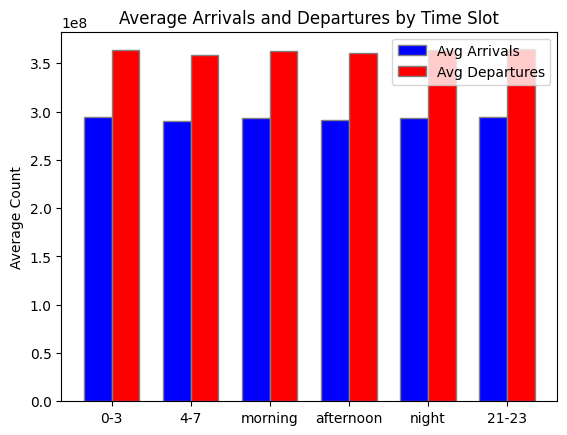

In [49]:
import matplotlib.pyplot as plt
# Plot the averages
fig, ax = plt.subplots()


# Define the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(time_slots))
r2 = [x + bar_width for x in r1]

# Create the bar charts
ax.bar(r1, avg_arrivals_list, color='b', width=bar_width, edgecolor='grey', label='Avg Arrivals')
ax.bar(r2, avg_departures_list, color='r', width=bar_width, edgecolor='grey', label='Avg Departures')

# Add labels and title
ax.set_ylabel('Average Count')
ax.set_title('Average Arrivals and Departures by Time Slot')
ax.set_xticks([r + bar_width / 2 for r in r1])
ax.set_xticklabels(time_slots)
ax.legend()

plt.show()

## Data Modeling

### Identify Dimensions and Facts
- **Dimensions:** These are descriptive attributes related to the facts. The categorical columns can serve as dimensions.
  - CA: Control Area
  - UNIT: Unit
  - SCP: Subunit Channel Position
  - STATION: Station name
  - LINENAME: Line name
  - DIVISION: Division
  - CREATED: Date and time
  - DESC: Description

- **Facts:** These are the measurable, quantitative data. The numerical columns can serve as facts.
    - ENTRIES: Number of entries
    - EXITS: Number of exits

In [50]:
# Create dim_station table
dim_station = df[['STATION', 'LINENAME']].drop_duplicates().reset_index(drop=True)
dim_station['station_id'] = dim_station.index + 1

# Create Dim_Booth table
df['BoothName'] = df['CA'] + '_' + df['UNIT']
dim_booth = df[['BoothName', 'SCP']].drop_duplicates().reset_index(drop=True)
dim_booth['booth_id'] = dim_booth.index + 1

# Merge to create Fact table
fact_turnstile = df.merge(dim_station, on=['STATION', 'LINENAME'], how='left')
fact_turnstile = fact_turnstile.merge(dim_booth, on=['BoothName', 'SCP'], how='left')
fact_turnstile = fact_turnstile[['station_id', 'booth_id','CREATED', 'ENTRIES', 'EXITS']]
fact_turnstile['log_id'] = fact_turnstile.index + 1

# Display the tables
print(dim_station.info())
# print(dim_booth.info())
print(fact_turnstile.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STATION     478 non-null    object
 1   LINENAME    478 non-null    object
 2   station_id  478 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 246421 entries, 0 to 246420
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station_id  246421 non-null  int64         
 1   booth_id    246421 non-null  int64         
 2   CREATED     246421 non-null  datetime64[ns]
 3   ENTRIES     246421 non-null  int64         
 4   EXITS       246421 non-null  int64         
 5   log_id      246421 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 13.2 MB
None


## Apply naming conventions to the models

In [51]:
# rename the station name and use a copy. if the dataset is too large use inplace to reduce memory usage
dim_station.rename(columns={'STATION': 'station_name'}, inplace=True)
dim_station.columns = dim_station.columns.str.lower()
dim_station.info()

dim_booth.rename(columns={'BoothName': 'booth_name'}, inplace=True)
dim_booth.columns = dim_booth.columns.str.lower()

fact_turnstile.columns = fact_turnstile.columns.str.lower()
fact_turnstile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_name  478 non-null    object
 1   linename      478 non-null    object
 2   station_id    478 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 246421 entries, 0 to 246420
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   station_id  246421 non-null  int64         
 1   booth_id    246421 non-null  int64         
 2   created     246421 non-null  datetime64[ns]
 3   entries     246421 non-null  int64         
 4   exits       246421 non-null  int64         
 5   log_id      246421 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 13.2 MB


## Join the dimension tables and fact table

In [52]:
import pandasql as psql

# SQL query to join fact table with dimension tables
query = """
SELECT
    f.created,
    s.station_name,
    b.booth_name,
    f.entries,
    f.exits
FROM 
    fact_turnstile f
JOIN 
    dim_station s ON f.station_id = s.station_id
JOIN 
    dim_booth b ON f.booth_id = b.booth_id
LIMIT 5
"""

# Execute the query
result = psql.sqldf(query, locals())

# Display the result
print(result)


                      created station_name booth_name  entries   exits
0  2024-10-19 00:00:00.000000        59 ST  A002_R051   224564  173837
1  2024-10-19 04:00:00.000000        59 ST  A002_R051   224575  173841
2  2024-10-19 08:00:00.000000        59 ST  A002_R051   224581  173868
3  2024-10-19 12:00:00.000000        59 ST  A002_R051   224623  173937
4  2024-10-19 16:00:00.000000        59 ST  A002_R051   224708  173984


### Next step: based on findings think about the following:

- Requirements
- Planning
- Design and Architecture

In [5]:
!jupyter nbconvert --to html --template lab mta_discovery.ipynb

/usr/bin/jupyter:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
[NbConvertApp] Converting notebook mta_discovery.ipynb to html
[NbConvertApp] Writing 727720 bytes to mta_discovery.html
